# Data preprocessing

In [29]:
# Import necessary libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# nltk.download('wordnet')

In [3]:
pwd = os.getcwd()

In [7]:
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', ' ', text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z0-9\s!?.,]", '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
   
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    text = ' '.join(tokens)
    return text

In [17]:
df_train = pd.read_csv(r"c:\Users\REBU\Desktop\final_dataset_train.csv")

In [18]:
df_train

,movie_id,movie_rating,review,label
0,tt0064354,3,Story of a man who has unnatural feelings for ...,bad
1,tt0100680,1,Robert DeNiro plays the most unbelievably inte...,bad
2,tt0100680,1,"I saw the capsule comment said ""great acting.""...",bad
3,tt0100680,4,If I had not read Pat Barker's 'Union Street' ...,bad
4,tt0047200,4,This fanciful horror flick has Vincent Price p...,bad
...,...,...,...,...
24995,tt0433360,7,What's Good About It: Some inventive and genui...,good
24996,tt0433360,8,For years we've been watching every horror fil...,good
24997,tt0324532,10,If you haven't already seen this movie of Mary...,good
24998,tt0324532,10,this movie is the best movie ever it has a lot...,good


In [19]:
# Use the created function to apply preprocessing techniques on the reviews
df_train['review'] = df_train['review'].apply(preprocess_text)

In [20]:
df_train.head()

,movie_id,movie_rating,review,label
0,tt0064354,3,story man unnatural feeling pig . start openin...,bad
1,tt0100680,1,robert deniro play unbelievably intelligent il...,bad
2,tt0100680,1,saw capsule comment said great acting . opinio...,bad
3,tt0100680,4,"read pat barker union street seeing film , wou...",bad
4,tt0047200,4,fanciful horror flick vincent price playing ma...,bad


In [21]:
#Encode the table
label = {'bad':0, 'good':1}
df_train['label'] = df_train['label'].map(label)

In [22]:
df_train

,movie_id,movie_rating,review,label
0,tt0064354,3,story man unnatural feeling pig . start openin...,0
1,tt0100680,1,robert deniro play unbelievably intelligent il...,0
2,tt0100680,1,saw capsule comment said great acting . opinio...,0
3,tt0100680,4,"read pat barker union street seeing film , wou...",0
4,tt0047200,4,fanciful horror flick vincent price playing ma...,0
...,...,...,...,...
24995,tt0433360,7,whats good inventive genuinely creepy little e...,1
24996,tt0433360,8,"year weve watching every horror film come , du...",1
24997,tt0324532,10,"havent already seen movie marykate ashleys , s...",1
24998,tt0324532,10,movie best movie ever lot live action great ev...,1


In [23]:

df_train.to_csv('preprocessed_train.csv', index=False)

In [24]:
df_train.head()

,movie_id,movie_rating,review,label
0,tt0064354,3,story man unnatural feeling pig . start openin...,0
1,tt0100680,1,robert deniro play unbelievably intelligent il...,0
2,tt0100680,1,saw capsule comment said great acting . opinio...,0
3,tt0100680,4,"read pat barker union street seeing film , wou...",0
4,tt0047200,4,fanciful horror flick vincent price playing ma...,0


In [26]:
#Data Overview
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      25000 non-null  object
 1   movie_rating  25000 non-null  int64 
 2   review        25000 non-null  object
 3   label         25000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 781.4+ KB
None


In [27]:
#Summary Statistics
print(df_train.describe())

       movie_rating        label
count  25000.000000  25000.00000
mean       5.477720      0.50000
std        3.466477      0.50001
min        1.000000      0.00000
25%        2.000000      0.00000
50%        5.500000      0.50000
75%        9.000000      1.00000
max       10.000000      1.00000


In [32]:
# Checking for null values on the train dataset

df_train.isnull().sum()

movie_id        0
movie_rating    0
review          0
label           0
dtype: int64

<Axes: xlabel='movie_rating'>

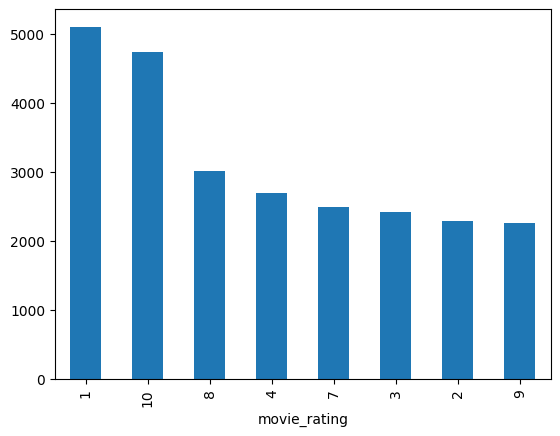

In [34]:
df_train['movie_rating'].value_counts().plot(kind = 'bar')

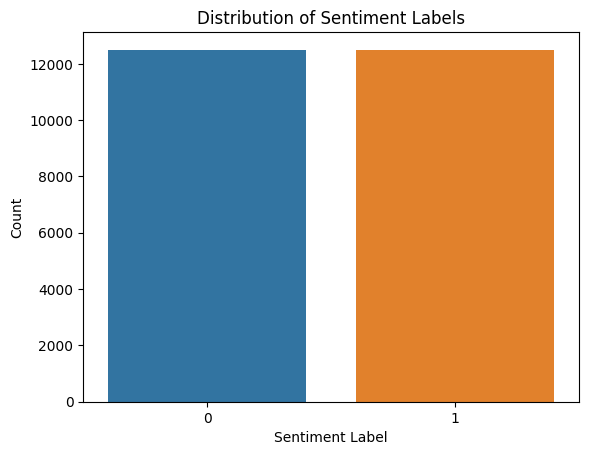

In [36]:
# Distribution of sentiment labels(0 or 1)
# We have approximately 12,000 reviews labeled as both positive (1) and negative (0)
sns.countplot(data=df_train, x='label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

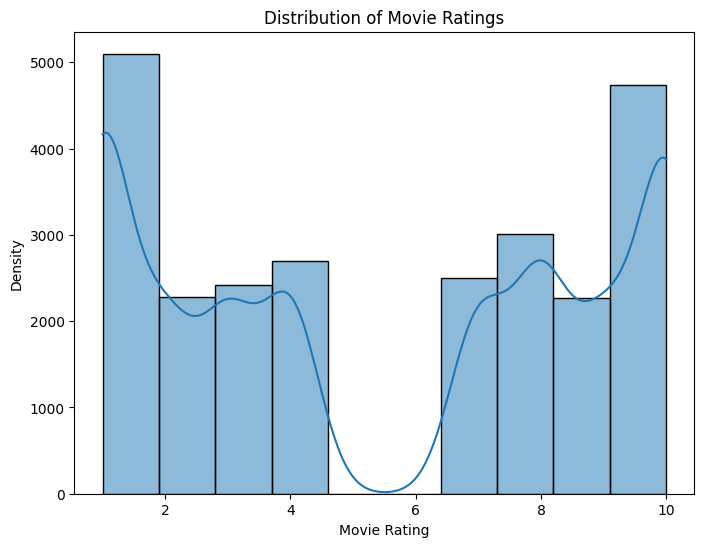

In [38]:
#Movie Rating Distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='movie_rating', bins=10, kde=True)
plt.xlabel('Movie Rating')
plt.ylabel('Density')
plt.title('Distribution of Movie Ratings')
plt.show()

The graph shows the distribution of movie ratings, ranging from 0 to 10.
Around rating 0: Many movies received extremely low ratings.
Around rating 10: Many movies received exceptionally high ratings.
There is a noticeable dip in density around ratings 5-6, suggesting fewer movies received average scores.
Overall, movies tend to receive either very positive or very negative ratings, with fewer falling in the middle range.

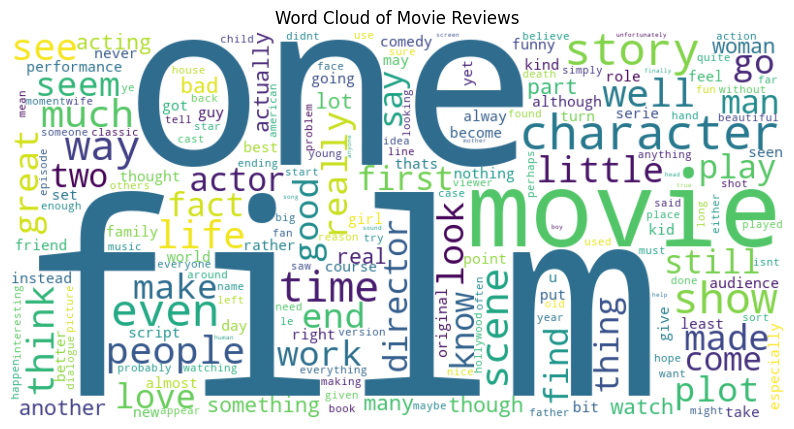

In [41]:
#Word Cloud for Reviews:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df_train['review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

The larger and bolder words in the cloud are the most frequently mentioned terms in the reviews.“film” and “movie”: These terms are central, indicating that they appear frequently in the reviews.
“time”: Suggests discussions about the duration or pacing of movies.
“story”: Likely related to plot and narrative.
“character”: Refers to the portrayal of individuals in the films.
Other smaller words may represent specific themes, genres, or emotions associated with the reviews.


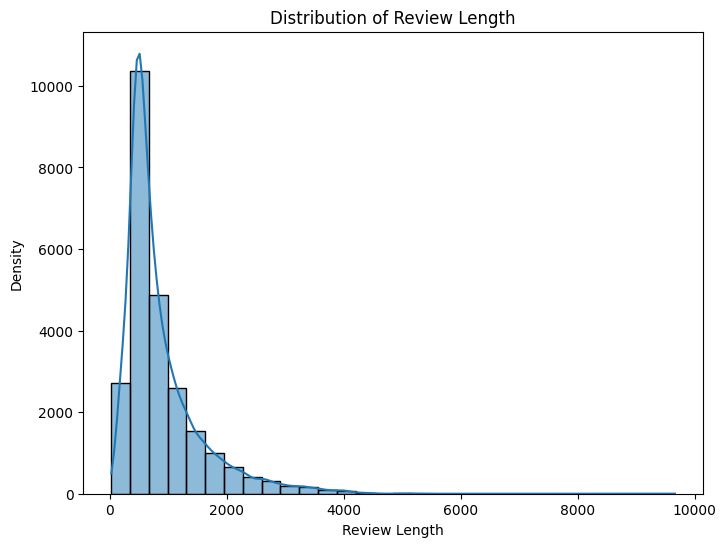

In [43]:
#Review Length
df_train['review_length'] = df_train['review'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='review_length', bins=30, kde=True)
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.title('Distribution of Review Length')
plt.show()


Most reviews are short in length, as indicated by the peak in density near the beginning of the x-axis.
As review length increases, the density sharply declines, suggesting that fewer reviews are longer.

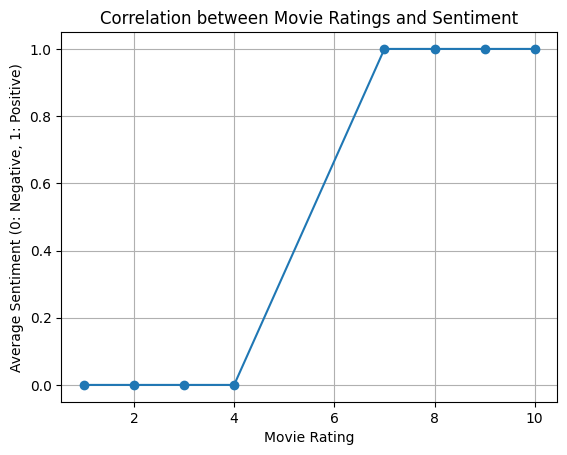

In [46]:
# Calculate the average sentiment label for each movie rating
avg_sentiment = df_train.groupby('movie_rating')['label'].mean()

# Plot the correlation between movie ratings and sentiment
plt.plot(avg_sentiment.index, avg_sentiment.values, marker='o')
plt.xlabel('Movie Rating')
plt.ylabel('Average Sentiment (0: Negative, 1: Positive)')
plt.title('Correlation between Movie Ratings and Sentiment')
plt.grid()
plt.show()

At movie rating 2, the average sentiment is around 0.2 (closer to negative).
At movie rating 4, the average sentiment is around 0.4 (still leaning negative).
As we move to higher ratings, the average sentiment increases.A blue line connects the data points.
The upward trend of the line indicates a positive correlation between movie ratings and sentiment.
In other words, as movie ratings increase, the average sentiment becomes more positive.